In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

def rule4(Q, A, errA, expA, B, errB, expB):
    """
    Q: The function that calculates the value that needs it's error determined.
    A: The function that calculates the value for A
    errA: The error in quantity A
    expA: The power (exponent) of quantity A
    ...and so on and so forth.
    """
    errQ = np.abs(Q) * np.sqrt((expA*(errA/A))**2+(expB*(errB/B))**2)
    return errQ

Experiment 1 - Plotting charging and discharging curves

In this experiment you will collect data which you will use to create two graphs, one displaying the charging behaviorof the capacitor and the other displaying the discharging behavior.


1.  Set up the circuit shown in Figure 3 using the 47μF capacitor and the 510 kΩ resistor.  It will be easier to construct the circuit without the voltmeters attached.  After it is constructed, then add the voltmeters.  You should have your instructor check your circuit to make sure it is correctly connected.


2.  Before turning on the power supply, set the switch to the discharging position.  Turn the power supply on and set it to 12 V.  (You may need to use a voltmeter connected to the terminals of the power supply to determine this.)


3.  Flip the switch so that it is in the charging position.  Record the voltage $V$ across the capacitor at ten second intervals for two minutes.  **NOTE: you may think of a clever way to use your cell phone’s camera to help take your data.


4.  Starting  with  a  BLANK  Jupyter  Notebook,  create  a  plot  of $V$ vs. $t$.    You  can  use  Matplotlib  to  do  asimple  plot  without  fitting  a  line  to  it  in  just  a  few  lines  of  code.   You  can  find  out  how  to  do  this  on http://matplotlib.org/tutorials/introductory/pyplot.html or use this as a starting point:

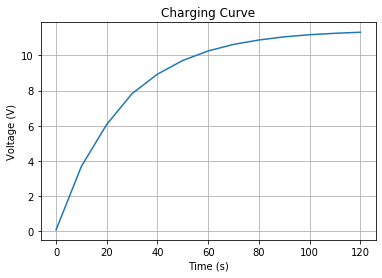

In [50]:
V = np.array([0.086,3.696,6.079,7.83,8.93,9.71,10.25,10.62,10.87,11.05,11.17,11.25,11.31]) # Volts
t = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120]) # Seconds

fig, charging = plt.subplots()
charging.set(xlabel='Time (s)', ylabel='Voltage (V)',title='Charging Curve')
charging.grid()
charging.plot(t,V)
#fig.savefig("charging_curve.png")
plt.show()

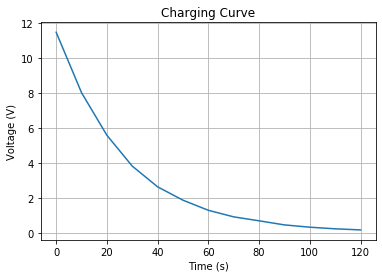

In [51]:
V = np.array([11.46,8.01,5.58,3.819,2.636,1.873,1.297,.922,.697,.463,.332,.240,.177])# Volts
t = np.array([0,10,20,30,40,50,60,70,80,90,100,110,120]) # Seconds

fig, dcharging = plt.subplots()
dcharging.set(xlabel='Time (s)', ylabel='Voltage (V)',title='Charging Curve')
dcharging.grid()
dcharging.plot(t,V)
#fig.savefig("discharging_curve.png")
plt.show()

Experiment 2 - Measuring time constant for charging and discharging

In this experiment you will determine the time constant of your RC circuit based on time measurements when the capacitor is charging and when it is discharging.  You will be using the same circuit from Experiment 1, and you will need the capacitor to be fully charged before you can proceed. Once the capacitor is fully charged, record the voltage $V_0$.  This is the maximum voltage across the capacitor.  We can calculate the expected voltage across the capacitor after one time constant has elapsed for when it is discharging and for when it is charging as the following:

$V_d = (0.368)V_0$

$V_c = (0.632)V_0$

Record the elapsed time while you alternate between trials of discharging and charging the capacitor.


•Discharging:  the voltmeter starts at $V_0$.  When it reaches $V_d$ record the elapsed time while discharging $t_d$.


•Charging:  the voltmeter starts at 0 V.  When it reaches $V_c$ record the elapsed time while charging $t_c$. 



After recording the elapsed time for a discharging trial, you can quickly set the voltage across the capacitor to 0 V by connecting the ends of the capacitor with a short wire.  This will get you ready for a charging trial (be sure to remove the short wire).  After recording the elapsed time for a charging trial, you will necessarily have to wait until the capacitor finishes charging to its maximum value before you can do the next discharging trial.  Perform 10 trials for both charging and discharging the capacitor.

In [52]:
V0 = 12.07 # Volts
Vd = np.round(0.368*V0,3)
Vc = np.round(0.632*V0,3)

dcharge_time = np.array([26.64,26.77,26.96,27.27,26.92,26.68,26.97,26.41,26.67,26.86]) # Seconds
charge_time  = np.array([29.49,29.26,29.77,28.94,29.47,29.58,29.52,29.55,29.54,29.34]) # Seconds

tau_disc = np.mean(dcharge_time)
err_tau_disc = np.std(dcharge_time)/(10**(1/2)) # Seconds

tau_char = np.mean(charge_time)
err_tau_char = np.std(charge_time)/(10**(1/2)) # Seconds

print("Vo =",V0,"volts")
print("Vd =",Vd,"volts")
print("Vc =",Vc,"volts")
print("Discharge Times:",dcharge_time,"seconds")
print("Charge Times:",charge_time,"seconds\n")

print("Avg. Discharge Time:",np.round(tau_disc,2),"plus or minus",np.round(err_tau_disc,3),"seconds.")
print("Avg. Charge Time:",np.round(tau_char,2),"plus or minus",np.round(err_tau_char,3),"seconds.")

Vo = 12.07 volts
Vd = 4.442 volts
Vc = 7.628 volts
Discharge Times: [26.64 26.77 26.96 27.27 26.92 26.68 26.97 26.41 26.67 26.86] seconds
Charge Times: [29.49 29.26 29.77 28.94 29.47 29.58 29.52 29.55 29.54 29.34] seconds

Avg. Discharge Time: 26.82 plus or minus 0.071 seconds.
Avg. Charge Time: 29.45 plus or minus 0.067 seconds.


Experiment 3 - Direct Measurement of R and C to find time constant RC


Directly measure the values and uncertainties for the resistance and capacitance of the resistor and capacitor, then calculate the time constant τ based on those values.  The uncertainty of the time constant δτ can be found from one of our error propagation rules.

In [53]:
R = 502.5e3 # Ohms
errR = .1e3

C = 53.8e-6 # Farads
errC = .1e-6

tau = R*C
err_tau = rule4(tau,R,errR,1,C,errC,1)

print("τ=",np.round(tau,2),"plus or minus",np.round(err_tau,2),"seconds.")

τ= 27.03 plus or minus 0.05 seconds.
